/var/folders/v4/vr3wk_q55dbbq68v6wdr2mrh0000gn/T/ipykernel_471/1372191728.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/v4/vr3wk_q55dbbq68v6wdr2mrh0000gn/T/ipykernel_471/1372191728.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/v4/vr3wk_q55dbbq68v6wdr2mrh0000gn/T/ipykernel_471/1372191728.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


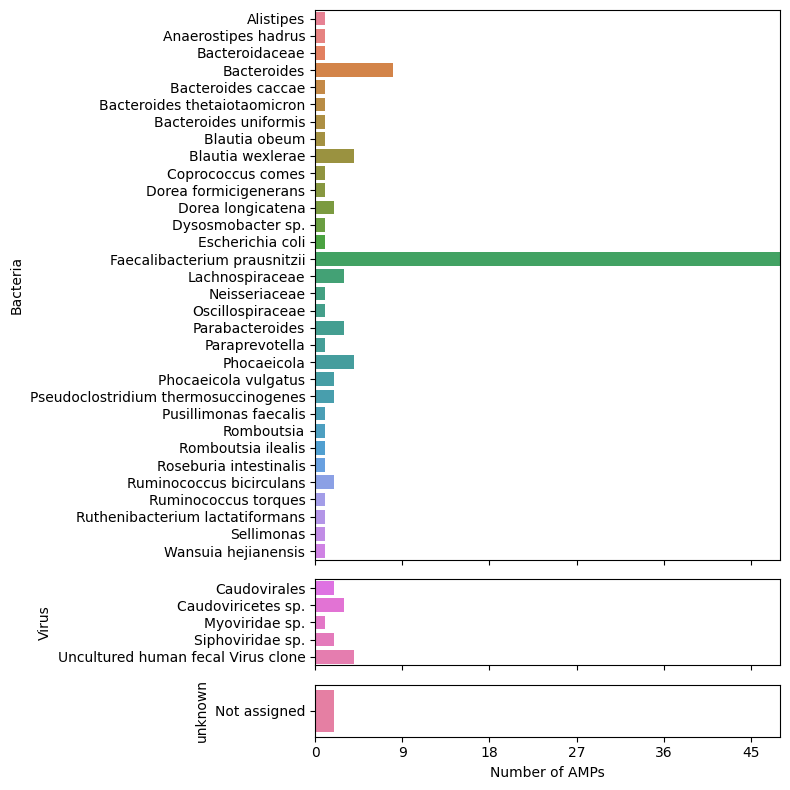

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Load the data
data = pd.read_csv("./114_amps_best_classification_sum_2.tsv", sep="\t")

# Create a unique color palette for each tax.id
unique_taxa = data["tax.id"].unique()
palette = sns.color_palette("husl", len(unique_taxa))
color_mapping = dict(zip(unique_taxa, palette))

# Group data by 'type'
grouped = data.groupby("type")

# Compute dynamic heights for each group (proportional to number of rows)
base_height_per_row = 0.4
heights = [max(1.2, base_height_per_row * len(group)) for _, group in grouped]

# Setup figure and gridspec
fig_height = sum(heights)
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(len(grouped), 1, height_ratios=heights)

# Plot each group
ax_list = []  # To store all axes for setting shared x-axis
for i, (type_name, group) in enumerate(grouped):
    ax = fig.add_subplot(gs[i])
    sns.barplot(
        data=group,
        x="count",
        y="tax.id",
        palette=[color_mapping[t] for t in group["tax.id"]],
        ax=ax
    )
    ax.set_title("")
    ax.set_ylabel(type_name)
    ax_list.append(ax)

    # Hide x-axis labels for all but the last subplot
    if i != len(grouped) - 1:
        ax.set_xlabel('')
        ax.set_xticklabels([])

# Synchronize the x-axis across all subplots
# Set common x-limits and x-ticks
max_count = data["count"].max()
for ax in ax_list:
    ax.set_xlim(0, max_count)
    ax.set_xticks(range(0, max_count + 1, int(max_count / 5)))

# Show x-axis labels only on the last subplot (bottom)
ax_list[-1].set_xlabel("Number of AMPs")

# Adjust layout and save
plt.tight_layout()
fig.savefig("./taxa_sum_variable_rows_shared_x_bottom_labels.svg")
fig.savefig("./taxa_sum_variable_rows_shared_x_bottom_labels.png")
